In [1]:
#Importing all the necessary libraries and modules 
import pandas as pd
import re 
import nltk 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection, naive_bayes, svm

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.pipeline import Pipeline

In [2]:
#Reading the csv file using pandas read_csv
df = pd.read_csv("flipkart.csv")

In [3]:
#To view the first five rows of the dataframe
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
#Outputs the number of rows and columns in the daqtaframe
df.shape

(20000, 15)

In [5]:
#Name of all the columns in our dataframe
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
#Ouputs the statistical features of only numerical columns
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [7]:
#Used to ouput total number of non-null values in each row, data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

>In this task we will take the "__description__" column as our main feature.<br>
>We can see that we have two null values in description column, in the code cell below we are trying to get the index of these two instances.

In [8]:
df[df['description'].isnull()].index

Int64Index([553, 17299], dtype='int64')

In [9]:
#Printing out the description of the index 553 and 17299
print(df['description'][553])
print(df['description'][17299])

nan
nan


>If we have decided to take description column as the main feature, we can drop the above two mentioned instances from our data frame as it doesn't have any description and thus it can't be used for either training or testing our model. 

In [10]:
df.drop([553, 17299] , inplace = True)

In [11]:
# We have dropped two rows
df.shape

(19998, 15)

In [12]:
#Let's print out one random description to see what does our features look like 
print(df['description'][37])

Specifications of Pick Pocket Embroidered Women's Waistcoat General Details Pattern Embroidered Occasion Casual Ideal For Women's Waistcoat Details Lining Polyester Fabric Bengal Silk Additional Details Style Code TL-012 Fabric Care First Time Dry Clean


>We see that there are many characters in the description which are not useful for us. Thus the next step that we adopt is of cleaning the strings of the desription column. We can clean these strings with the help of *regex* library.

In [13]:
def preprocessing_string(str_arg):
    '''
    input: str_arg --> Takes string to clean
    output: cleaned_str --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other kernel.

    '''
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form

In [14]:
'''
    Lets see how our string look after we appply the "preprocessing_string" function on it.
'''
print(df["description"][0])
print('\n')
print(preprocessing_string(df["description"][0]))

Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts


key features of alisha solid women s cycling shorts cotton lycra navy red navy specifications of alisha solid women s cycling shorts shorts details number of contents in sales package pack of fabric cotton lycra type cycling shorts general details pattern solid ideal for women s fabric care gentle machine wash in lukewarm water do not bleach additional details style code altht p in the box shorts


>As mentioned in the task, the main goal is to find the category of product. The "__product_category_tree__" column in dataframe is our target.<br>

In [15]:
#lets look at the product_category_tree column
df['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 19998, dtype: object

>We can see that there are numerous categories in the dataframe, also we can notice that in each category there are some sub categories, as per the task requirement we only need focus on the "*main*" or so called "*parent*" categories.<br>
For this purpose we need to process these categories in order to extract the "main" category of the product.

In [16]:
# Category processing
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

In [17]:
#lets look at some of the main categories extracted by the help of the lambda, split and strip.
print(df['product_category_tree'][50])
print(df["product_category_tree"][0])

Vishudh Printed Women's Straight Kurta"]
Clothing


In [18]:
#Total number of uniques "parent"
df['product_category_tree'].nunique()

266

In [19]:
#Printing out all the unique categories
df['product_category_tree'].unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet Supplies',
       'Eternal Gandhi Super Series Crystal Paper Weight..."]',
       'Pens & Stationery', 'Sports & Fitness',
       'Beauty and Personal Care',
       'Bengal Blooms Rose Artificial Plant  with Pot (3..."]',
       'Bags, Wallets & Belts', 'Home Decor & Festive Needs',
       'Automotive', 'Tools & Hardware',
       'Vishudh Printed Women\'s Straight Kurta"]',
       'Vishudh Printed Women\'s Anarkali Kurta"]',
       'BuildTrack PIR Wireless Motion Sensor - One Swit..."]',
       'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER..."]',
       'MASARA Solid Women\'s Straight Kurta"]',
       'Skayvon SUBMERSIBBLE THREE PHASE PUMP CONTROLLER..."]',
       'Behringer Xenyx 502 Analog Sound Mixer"]',
       'Noor Embroidered Women\'s Straight Kurta"]',
       'Libas Printed Women\'s A-line Kurta"]',
       'Libas Printed Women\'s Anarkali Kurta"]', 'Home Furnishing',
       'Baby Care', 'Mobiles & Accessories', 'Food & Nutriti

>As we can notice there are many examples where the product doesn't have a definite category.<br>
For example instead of categorising the product under clothing, it's rather filled the product detail as the category.<br>
See the code cell below, which shows a example of indefinite category.

In [20]:
print(df['product_category_tree'][50])

Vishudh Printed Women's Straight Kurta"]


>In order to prevent such instances where the product category is not definite we will chose only those categories which have a definite property such as clothing, footwear, camera and acessories etc.<br>
We have chosen the first 28 categories.
We can run the following code to determine the index until which we have a definite product category<br>
We can run the following python code to get a list all the definite categories in descending order by "uniq_id", then understand why we chose  first 28 categories

```python 
list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(30).index)
```

In [21]:
# Taking only top categories
top_cat = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [22]:
print(top_cat)

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness', 'Cameras & Accessories', 'Home Improvement', 'Health & Personal Care Appliances', 'Sunglasses', 'Gaming', 'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'eBooks', 'Eyewear']


In [23]:
# Selecting only relevant columns
processed_df = df[df['product_category_tree'].isin(top_cat)][['product_category_tree','description']]

In [24]:
processed_df

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...
...,...,...
19995,Baby Care,Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996,Baby Care,Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...
19998,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...


>In the code cell below we are plotting a bar plot to show which category has maximum number of product.<br>
We should notice that the total no. of products will not be equal to 20,000 as we have removed some rows from our original dataset as mentioned in the above cells<br>

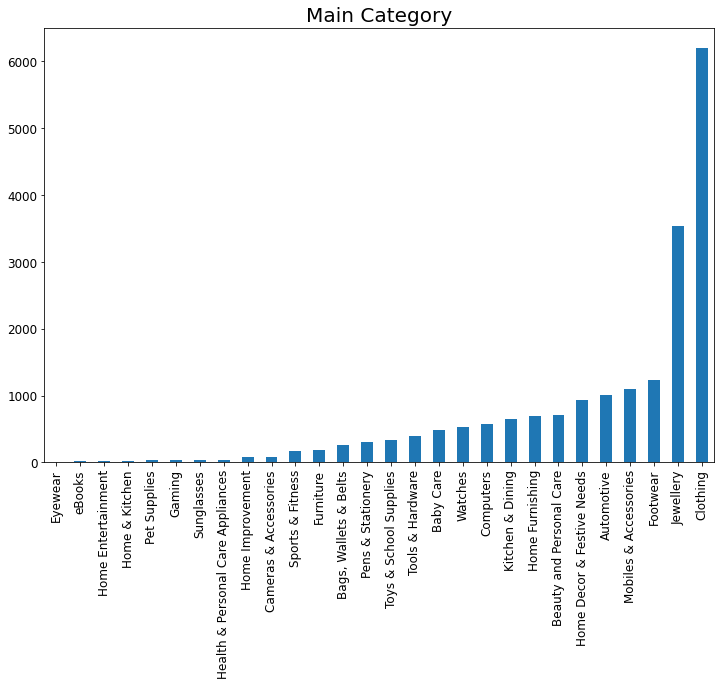

Top Main Categories by Sales.

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             35
Gaming                                 35
Pet

In [25]:
plt.figure(figsize=(12,8))
df['product_category_tree'].value_counts()[:28].sort_values(ascending=True).plot(kind='bar')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Main Categories by Sales.\n')
print(df['product_category_tree'].value_counts()[:28])

In [26]:
# Cleaning strings
processed_df['description'] = processed_df['description'].astype('str').apply(preprocessing_string)

In [27]:
processed_df

,product_category_tree,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish col...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...
...,...,...
19995,Baby Care,buy walldesign small vinyl sticker for rs onli...
19996,Baby Care,buy wallmantra large vinyl stickers sticker fo...
19997,Baby Care,buy elite collection medium acrylic sticker fo...
19998,Baby Care,buy elite collection medium acrylic sticker fo...


In [28]:
# Creating a list of categories for later use
cat_list = list(processed_df['product_category_tree'].unique())

In [29]:
# Printing the list of top categories
print(cat_list)

['Clothing', 'Furniture', 'Footwear', 'Pet Supplies', 'Pens & Stationery', 'Sports & Fitness', 'Beauty and Personal Care', 'Bags, Wallets & Belts', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Home & Kitchen', 'Computers', 'Cameras & Accessories', 'Health & Personal Care Appliances', 'Gaming', 'Home Improvement', 'Sunglasses', 'Home Entertainment', 'Eyewear', 'eBooks']


In [30]:
# Encoding the product category
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded

In [31]:
#Printing the encoded value and their corresponding values
for i in range(28):
    print(str(i) + "-" + le.inverse_transform([i]))

['0-Automotive']
['1-Baby Care']
['2-Bags, Wallets & Belts']
['3-Beauty and Personal Care']
['4-Cameras & Accessories']
['5-Clothing']
['6-Computers']
['7-Eyewear']
['8-Footwear']
['9-Furniture']
['10-Gaming']
['11-Health & Personal Care Appliances']
['12-Home & Kitchen']
['13-Home Decor & Festive Needs']
['14-Home Entertainment']
['15-Home Furnishing']
['16-Home Improvement']
['17-Jewellery']
['18-Kitchen & Dining']
['19-Mobiles & Accessories']
['20-Pens & Stationery']
['21-Pet Supplies']
['22-Sports & Fitness']
['23-Sunglasses']
['24-Tools & Hardware']
['25-Toys & School Supplies']
['26-Watches']
['27-eBooks']


In [32]:
processed_df.head()

,product_category_tree,description
0,5,key features of alisha solid women s cycling s...
1,9,fabhomedecor fabric double sofa bed finish col...
2,8,key features of aw bellies sandals wedges heel...
3,5,key features of alisha solid women s cycling s...
4,21,specifications of sicons all purpose arnica do...


>We have taken only those products which have a definite categories.<br>
In the code cell below we can notice the change in the shape of our dataframe.

In [33]:
#Shape of processed_df
processed_df.shape

(19661, 2)

>The following code cell is for spliting our data into traing and testing data<br>
We are splitting our dataset as follows:<br>
Training Data - 80%<br>
Testing Data  - 20%

In [34]:
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15728,)
(15728,)
(3933,)
(3933,)


>Let's look at our training features

In [36]:
print(X_train.head())

7685     specifications of totalcare expert metal glass...
18364    speedwav red led strobe brake lights set of fo...
18247    specifications of katwa clasic floral seater t...
806      kea casual sleeveless solid women s top price ...
5572     goldnera alloy necklace buy goldnera alloy nec...
Name: description, dtype: object


>Let's look at our training labels

In [37]:
print(y_train.head())

7685      0
18364     0
18247    15
806       5
5572     17
Name: product_category_tree, dtype: int32


>Scikit-learn’s CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.<br>
>- CountVectorizer - https://medium.com/swlh/understanding-count-vectorizer-5dd71530c1b<br>
>- Stop words - https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47<br>
>- Vectorization https://developers.google.com/machine-learning/guides/text-classification/step-3#vectorization<br>
>- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [38]:
'''
This code block is for converting the training data to vectorized form

'''
# Instantiating the vectorizer and removing stop words
vect = CountVectorizer(analyzer='word', stop_words = 'english')
# Converting the train data
X_train_matrix = vect.fit_transform(X_train) 

In [39]:
# vect.get_feature_names()
X_train_matrix.shape

(15728, 17577)

rows x columns<br>
document = rows<br>
term = columns<br>

In [40]:
vect.vocabulary_

{'specifications': 14536,
 'totalcare': 15891,
 'expert': 5359,
 'metal': 9682,
 'glass': 6458,
 'shiner': 13864,
 'car': 2320,
 'washer': 16931,
 'ml': 9869,
 'general': 6341,
 'brand': 1927,
 'quantity': 12299,
 'model': 9906,
 'number': 10596,
 'box': 1879,
 'vehicle': 16592,
 'washing': 16933,
 'liquid': 8962,
 'speedwav': 14552,
 'red': 12605,
 'led': 8755,
 'strobe': 14958,
 'brake': 1919,
 'lights': 8897,
 'set': 13714,
 'force': 6008,
 'projector': 12084,
 'lens': 8809,
 'price': 11986,
 'rs': 13192,
 'riding': 13003,
 'safely': 13295,
 'considered': 3288,
 'challenge': 2568,
 'safe': 13290,
 'braking': 1921,
 'suddenly': 15061,
 'taking': 15377,
 'turn': 16191,
 'make': 9311,
 'stylish': 15015,
 'stand': 14722,
 'crowd': 3622,
 'help': 7018,
 'road': 13063,
 'unwanted': 16401,
 'weather': 16988,
 'conditions': 3232,
 'feature': 5624,
 'easy': 4744,
 'fitx': 5808,
 'durable': 4661,
 'long': 9055,
 'lasting': 8665,
 'flashes': 5841,
 'applied': 763,
 'works': 17254,
 'current': 

In [41]:
'''
This code block is for training vectorized data

'''
# Instantiate a Multinomial Naive Bayes model
model=MultinomialNB()

# Train the model
model.fit(X_train_matrix, y_train)

# Scoring the trained model
print("Accuracy of model on training data:" , model.score(X_train_matrix, y_train))

Accuracy of model on training data: 0.9505340793489319


In [42]:
'''
This code block is for predicting & scoring test data

'''

# Converting the test data
X_test_matrix = vect.transform(X_test) 

# Scoring for the test data
print ("Accuracy of model on testing data:", model.score(X_test_matrix, y_test))

Accuracy of model on testing data: 0.9359267734553776


In [43]:
'''
Time taken by our model for traing 
'''
%time model.fit(X_train_matrix, y_train)

Wall time: 155 ms


MultinomialNB()

In [44]:
# Printing score 
predicted_result=model.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       221
           1       0.81      0.71      0.76        86
           2       0.79      0.55      0.65        55
           3       0.78      0.94      0.85       125
           4       1.00      0.08      0.14        13
           5       0.99      0.98      0.99      1223
           6       0.92      0.73      0.81       119
           7       1.00      0.67      0.80         3
           8       0.98      0.99      0.98       264
           9       0.93      0.90      0.91        29
          10       0.60      0.75      0.67         4
          11       1.00      0.50      0.67         6
          12       1.00      0.67      0.80         3
          13       0.93      0.98      0.95       203
          14       1.00      0.20      0.33         5
          15       0.90      1.00      0.95       113
          16       1.00      0.24      0.38        17
          17       0.90    

>Now we will use TfidfVectorizer  and compare the accuracy of models on the basis of method of vectorization.<br>
We can clearly see that Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.<br>
>- Medium article on TfidfVectorizer- https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a<br>
>- Scikit learn documentation
https://scikitlearn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [45]:
'''
This code block is for converting the training data to Tf-Idf form

'''
# Removing stop words
vectorizer = TfidfVectorizer(analyzer = 'word' , stop_words = 'english')
# Converting the train data
X_train_tfidf = vectorizer.fit_transform(X_train)

In [46]:
'''
This code block is for training

'''
# Instantiate a Multinomial Naive Bayes model
model2=MultinomialNB()

# Fitting to multinomial NB model
model2.fit(X_train_tfidf, y_train)

# Scoring the trained model (Expected to be above 95 percent)
print("Accuracy of model on training data:" , model2.score(X_train_tfidf, y_train))

Accuracy of model on training data: 0.8825025432349949


In [47]:
'''
This code block is for predicting & scoring test data

'''
# Converting the test data
X_test_tfidf = vectorizer.transform(X_test) 

# Printing score
print ("Accuracy of model on testing data:" , model2.score(X_test_tfidf, y_test))

Accuracy of model on testing data: 0.8721078057462497


>We used two vectorizer here, CountVectorizer and TfidfVectorizer, and out of these two vectorizer we can observe that the CountVectorizer performed better than TfidfVectorizer.<br>

>In the following models we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.<br>

### Using Logistic Regression

In [48]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , logreg.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.9633867276887872
Accuracy of model on training data: 0.9756485249237029
                                   precision    recall  f1-score   support

                         Clothing       0.97      0.98      0.98       221
                        Jewellery       0.99      0.79      0.88        86
                         Footwear       0.88      0.82      0.85        55
            Mobiles & Accessories       0.99      0.93      0.96       125
                       Automotive       1.00      0.77      0.87        13
       Home Decor & Festive Needs       0.96      1.00      0.98      1223
         Beauty and Personal Care       0.95      0.96      0.95       119
                  Home Furnishing       1.00      0.67      0.80         3
                 Kitchen & Dining       0.98      0.98      0.98       264
                        Computers       0.97      0.97      0.97        29
                          Watches       1.00      0.50      0.67         4
                

c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

### Using Stochastic Gradient Descent (SGD)

In [49]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , sgd.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9486397152301043
Accuracy of model on training data: 0.9595625635808749
                                   precision    recall  f1-score   support

                         Clothing       0.95      0.98      0.97       221
                        Jewellery       0.92      0.56      0.70        86
                         Footwear       0.88      0.84      0.86        55
            Mobiles & Accessories       0.97      0.91      0.94       125
                       Automotive       1.00      0.85      0.92        13
       Home Decor & Festive Needs       0.95      1.00      0.97      1223
         Beauty and Personal Care       0.92      0.90      0.91       119
                  Home Furnishing       1.00      0.33      0.50         3
                 Kitchen & Dining       0.96      0.98      0.97       264
                        Computers       0.93      0.97      0.95        29
                          Watches       0.50      0.25      0.33         4
                

c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

### Using Support Vector Machines(SVM)

In [50]:
svmsvc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
               ])
svmsvc.fit(X_train, y_train)

y_pred = svmsvc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , svmsvc.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9750826341215357
Accuracy of model on training data: 0.9911622583926755
                                   precision    recall  f1-score   support

                         Clothing       0.99      0.99      0.99       221
                        Jewellery       0.90      0.85      0.87        86
                         Footwear       0.94      0.91      0.93        55
            Mobiles & Accessories       1.00      0.96      0.98       125
                       Automotive       1.00      0.92      0.96        13
       Home Decor & Festive Needs       0.99      0.99      0.99      1223
         Beauty and Personal Care       0.94      0.96      0.95       119
                  Home Furnishing       1.00      1.00      1.00         3
                 Kitchen & Dining       1.00      0.98      0.99       264
                        Computers       0.97      0.97      0.97        29
                          Watches       1.00      0.50      0.67         4
                

c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vaishnavi jha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

>Checking how our model works overall!<br>  

In [51]:
#In this codeblock we are calculating the total no.of correct predictions made by our model using svm algorithm
nr_correct = (y_test == svmsvc.predict((X_test))).sum()
print(nr_correct)

3835


In [52]:
X_test

19997    buy elite collection medium acrylic sticker fo...
7570     key features of awesome self design faux georg...
9971     smugglerzinc solid men s polo neck t shirt buy...
15676    kujaparis casual shoes buy kujaparis casual sh...
10267    key features of anti gravity black rucksack l ...
                               ...                        
511      selfcare soft comfortable newly launched girl ...
19242    specifications of transcend premium memory ddr...
10074    sportking women s leggings price rs these legg...
8163     key features of gaga canvas painting theme han...
14873    reckler slim fit men s jeans buy two black shi...
Name: description, Length: 3933, dtype: object

In [53]:
test_desc = X_test[8163]
test_desc

'key features of gaga canvas painting theme hand painting frame included specifications of gaga canvas painting inch x inch general brand gaga model number am frame included yes painting type canvas painting theme hand painting dimensions weight kg height inch width inch in the box pack of '

>Testing Blocks: Test your string

In [54]:
'''
Multinomial Naive Bayes
'''
le.inverse_transform(model.predict(vect.transform([test_desc])))

array(['Home Decor & Festive Needs'], dtype=object)

In [55]:
'''
Logistic Regression
'''
le.inverse_transform(logreg.predict([test_desc]))

array(['Home Decor & Festive Needs'], dtype=object)

In [56]:
'''
Stochastic Gradient Descent (SGD)
'''
le.inverse_transform(sgd.predict([test_desc]))

array(['Home Decor & Festive Needs'], dtype=object)

In [57]:
'''
Support Vector Machines
'''
le.inverse_transform(svmsvc.predict([test_desc]))

array(['Home Decor & Festive Needs'], dtype=object)

>We can input any description from the dataset and check how accurate our models are.<br><br>

>Out of all the algorithms we used we notice that the Support vector machine algorithm gives the highest accuracy.<br>